In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### function defention 

In [44]:
   
    def preprocessing(X):
        return np.c_[np.ones([X.shape[0],1]),X]
    
    def compute_r2(y_true, y_predicted):
		y_bar = y_true.mean()
		ss_tot = ((y_true-y_bar)**2).sum()
		ss_res = ((y_true-y_predicted)**2).sum()
		return 1 - (ss_res/ss_tot)
    
    def MAE(y_true, y_predicted):
		return  np.mean(np.abs(y_predicted - y_true))  
    
    def compute_rss_rse(y_true, y_predicted):
        rss=np.sum(np.square(y_true- y_predicted))
        rse = np.sqrt(rss / (len(y_true) - 2))
        return rss,rse
    
    def predict(X,theta):
        X =preprocessing(X)
        return X.dot(theta)
    

### data preparing

In [45]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Admin\AppData\Local\Temp\ipykernel_16704\711682586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(1)


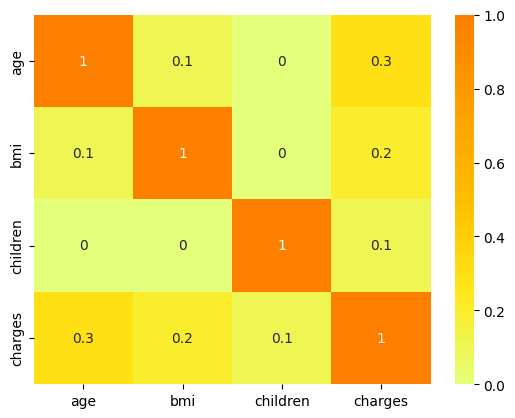

In [48]:
corr = df.corr().round(1)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

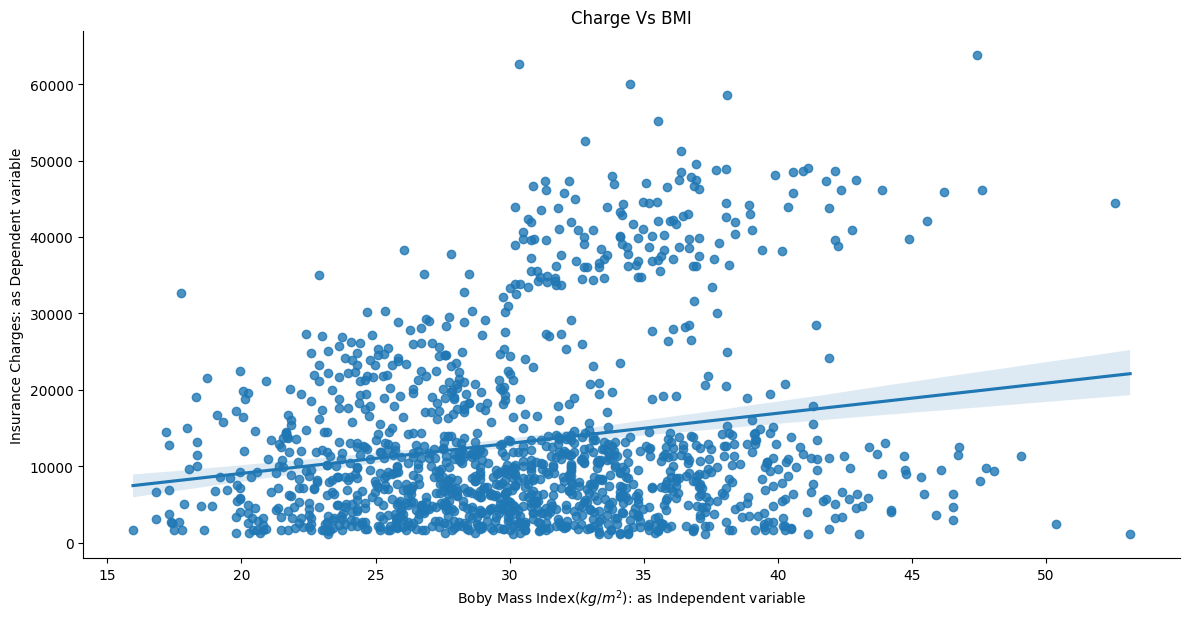

In [49]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

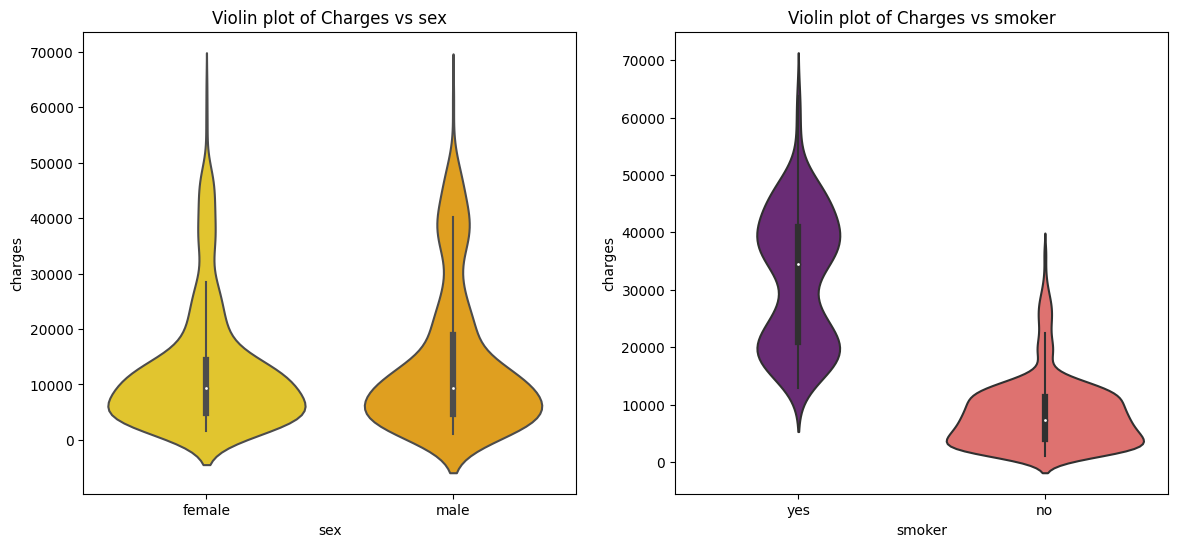

In [50]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

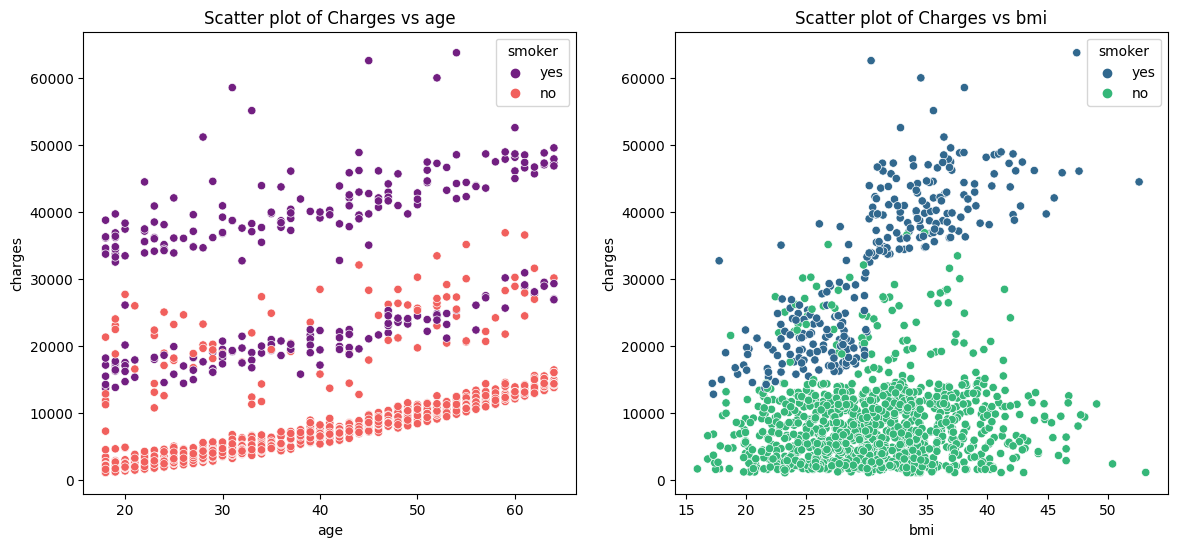

In [51]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [52]:
df["sex"].replace({"male": 0, "female": 1}, inplace=True) # Male: 0, Female: 1
df["smoker"].replace({"yes": 1, "no": 0}, inplace=True) # Yes: 1, No: 0

df = pd.get_dummies(df) # divide regions column into four different column with binary labels
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [53]:
corr = df.corr().round(1)
corr['charges']

age                 0.3
sex                -0.1
bmi                 0.2
children            0.1
smoker              0.8
charges             1.0
region_northeast    0.0
region_northwest   -0.0
region_southeast    0.1
region_southwest   -0.0
Name: charges, dtype: float64

In [54]:
#making the charges the last column
charges = df.pop('charges') 
df['charges']=charges
df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,0,1,16884.92400
1,18,0,33.770,1,0,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,0,1,0,4449.46200
3,33,0,22.705,0,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,1,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,0,1,2007.94500


In [55]:
data=np.array(df)
data.shape

(1338, 10)

In [56]:
data[0][9]#the target y 9

16884.924

In [57]:
X=data[:,0:9]
y=data[:,9:]
data_norm=(X-X.mean(axis=0))/X.std(axis=0)
data_norm.shape, y.shape


((1338, 9), (1338, 1))

In [58]:
y[:10],data_norm[0]

(array([[16884.924  ],
        [ 1725.5523 ],
        [ 4449.462  ],
        [21984.47061],
        [ 3866.8552 ],
        [ 3756.6216 ],
        [ 8240.5896 ],
        [ 7281.5056 ],
        [ 6406.4107 ],
        [28923.13692]]),
 array([-1.43876426,  1.0105187 , -0.45332   , -0.90861367,  1.97058663,
        -0.56526686, -0.56641788, -0.61132367,  1.76548098]))

In [59]:
splitter=int(len(X)*0.8) #pareto principle
splitter

1070

In [60]:
X_train=data_norm[:splitter]
y_train=y[:splitter]
X_test=data_norm[splitter:]
y_test=y[splitter:]

In [61]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 9), (1070, 1), (268, 9), (268, 1))

###  normal_equation

In [62]:
X_b=np.c_[np.ones([X_train.shape[0],1]),X_train]
n_theta=np.dot(np.linalg.inv(np.dot(X_b.transpose(),X_b)),np.dot(X_b.transpose(),y_train))

In [63]:
n_theta

array([[13185.5381878 ],
       [ 3640.47578169],
       [  131.83535626],
       [ 2100.28916763],
       [  530.92368373],
       [ 9533.96725219],
       [ 2496.        ],
       [ 2304.        ],
       [ 2048.        ],
       [ 1728.        ]])

In [64]:
y_predict = predict(X_test,n_theta)
r2_score=compute_r2(y_test,y_predict)
rss,rse=compute_rss_rse(y_test,y_predict)
mae_n=MAE(y_test,y_predict)
print(f"the r2 is {r2_score} the rss is {rss} the rse is {rse} and the mae is {mae_n}")

the r2 is 0.7567412105346021 the rss is 10035079360.247992 the rse is 6142.138247920784 and the mae is 4263.4227405047795


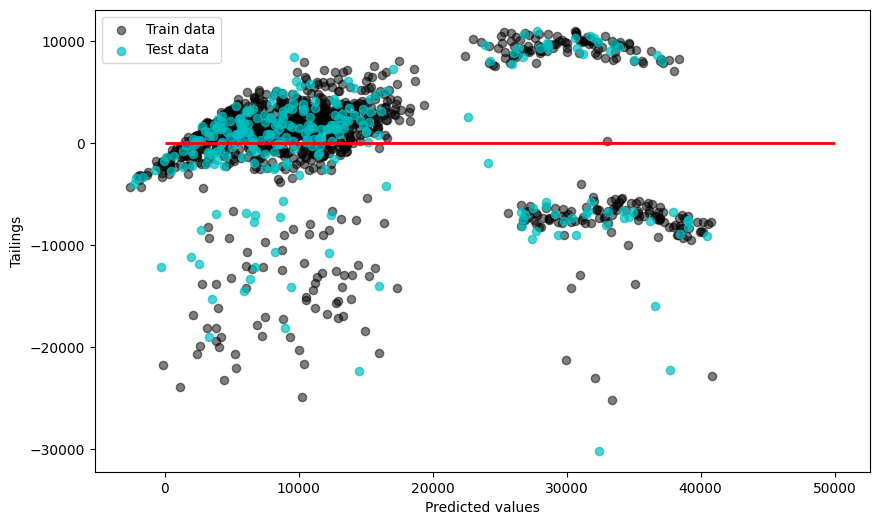

In [65]:
y_predict_train = predict(X_train,n_theta)
y_predict_test = predict(X_test,n_theta)
plt.figure(figsize=(10,6))

plt.scatter(y_predict_train,y_predict_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_predict_test,y_predict_test - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 50000, lw = 2, color = 'red')
plt.show()

### gradient descent 

In [66]:
eta = 0.1  # learning rate
n_iterations = 100
rss_lst =[]
rse_lst=[]
m = X.shape[0]

X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
theta = np.random.randn(len(X_b[0]), 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
    theta = theta - eta * gradients
    rss,rse=compute_rss_rse(y_train, X_b.dot(theta))
    rss_lst.append(rss)
    rse_lst.append(rse)
theta

array([[13185.52618537],
       [ 3644.46861357],
       [  126.89169452],
       [ 2067.65853172],
       [  529.21570897],
       [ 9545.1784217 ],
       [  307.54969261],
       [  105.60405039],
       [ -178.60750398],
       [ -226.42378299]])

In [67]:
#on test data
y_predict = predict(X_test,theta)
r2_score=compute_r2(y_test,y_predict)
rss,rse=compute_rss_rse(y_test,y_predict)
mae_g=MAE(y_test,y_predict)
print(f"the r2 is {r2_score} the rss is {rss} the rse is {rse} and the mae is {mae_g}")

the r2 is 0.7584847058313074 the rss is 9963155489.76788 the rse is 6120.0875619589515 and the mae is 4225.2304686542375


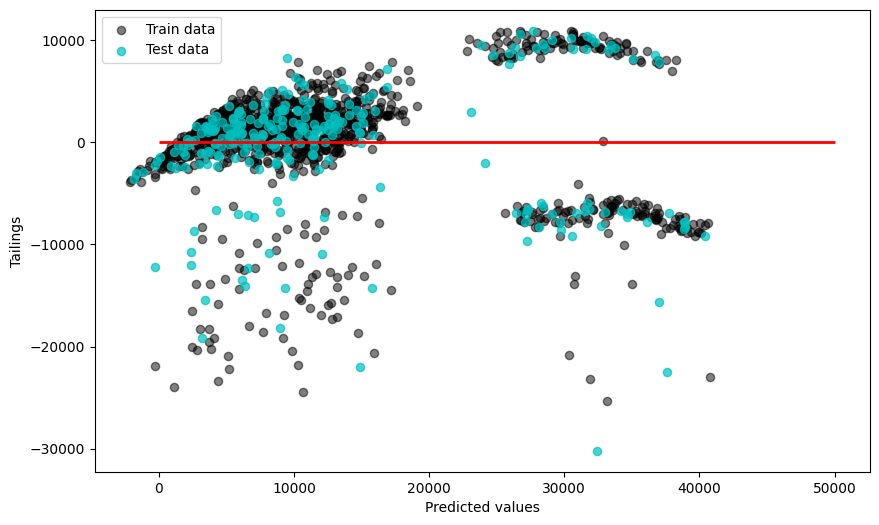

In [68]:

y_predict_train = predict(X_train,theta)
y_predict_test = predict(X_test,theta)
plt.figure(figsize=(10,6))

plt.scatter(y_predict_train,y_predict_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_predict_test,y_predict_test - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 50000, lw = 2, color = 'red')
plt.show()

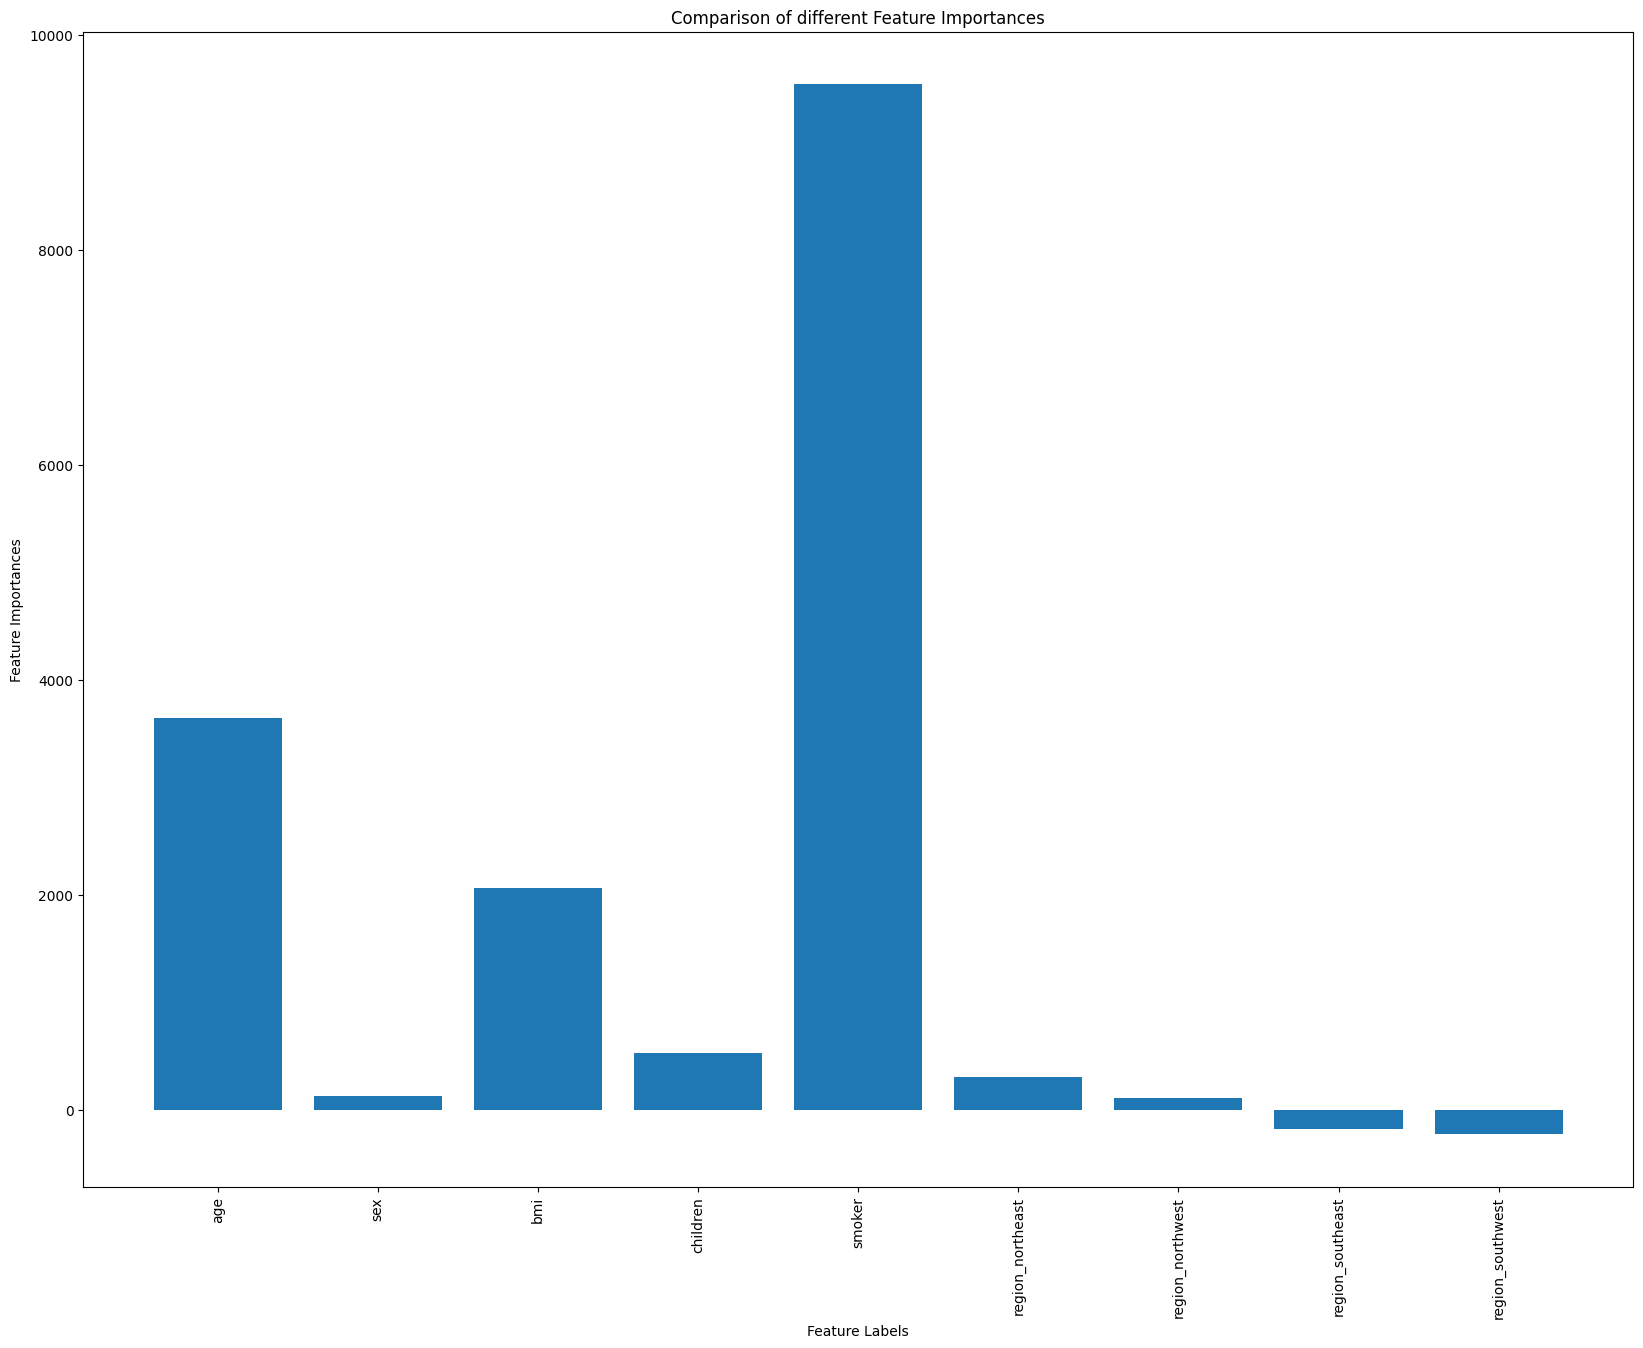

In [69]:
plt.figure(figsize=(20,15))
col=df.columns[0:9]
col=np.array(col)
feat=np.squeeze(theta[1:])
plt.bar(col, feat)
plt.xlabel('Feature Labels')
plt.xticks(rotation = 90)
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


In [70]:
parameter = ['theta_'+str(i) for i in range(X_train.shape[1])]
columns = col
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':feat})
parameter_df

,Parameter,Columns,theta
0,theta_0,age,3644.468614
1,theta_1,sex,126.891695
2,theta_2,bmi,2067.658532
3,theta_3,children,529.215709
4,theta_4,smoker,9545.178422
5,theta_5,region_northeast,307.549693
6,theta_6,region_northwest,105.604050
7,theta_7,region_southeast,-178.607504
8,theta_8,region_southwest,-226.423783


Text(0, 0.5, 'RSE')

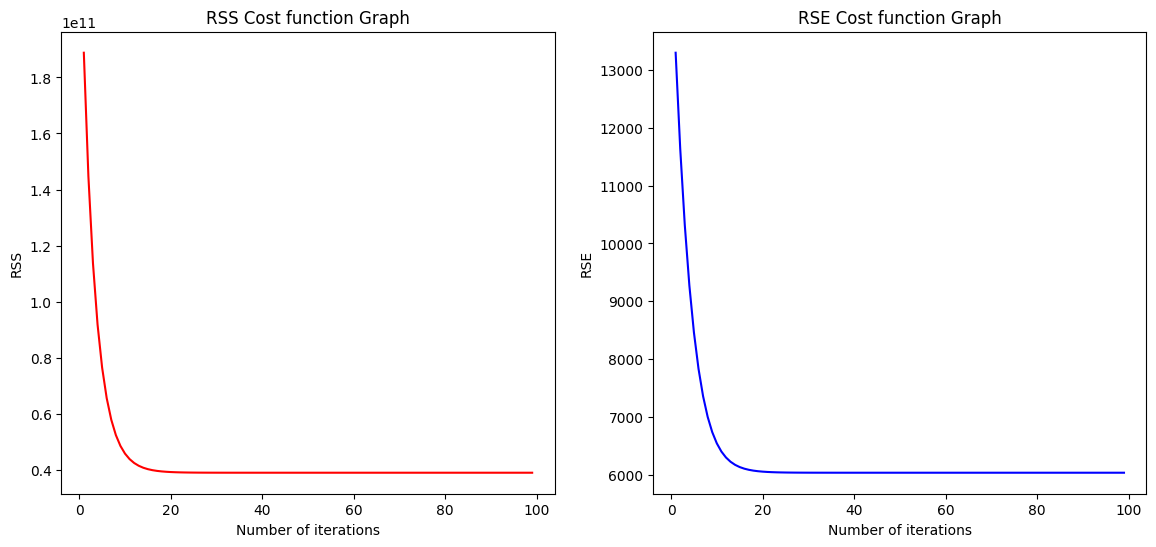

In [71]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
plt.plot(np.arange(1,n_iterations),rss_lst[1:], color = 'red')
ax.set_title('RSS Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('RSS')
ax = f.add_subplot(122)
plt.plot(np.arange(1,n_iterations),rse_lst[1:], color = 'blue')
ax.set_title('RSE Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('RSE')


In [72]:
eta_ls= np.arange(0.005, 0.15, 0.005)
rss_lst =list()
rse_lst=list()
for eta in eta_ls:
 # learning rate
    n_iterations = 50
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
    rss,rse=compute_rss_rse(y_train, X_b.dot(theta))
    rss_lst.append(rss)
    rse_lst.append(rse)


Text(0, 0.5, 'RSE')

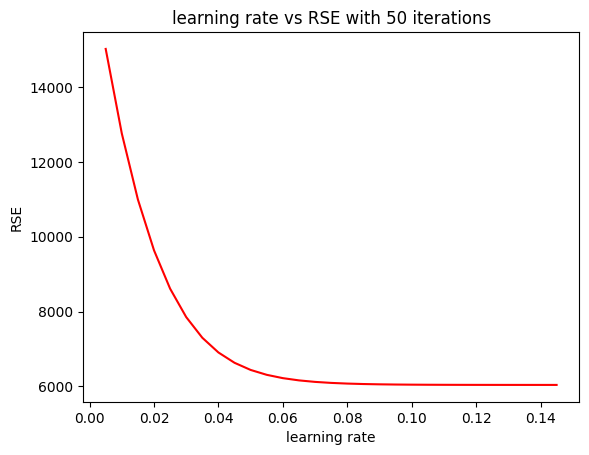

In [73]:
plt.plot(eta_ls,rse_lst, color = 'red')
plt.title('learning rate vs RSE with 50 iterations')
plt.xlabel('learning rate')
plt.ylabel('RSE')

In [74]:
eta_ls= [0.1,0.075,0.05,0.025,0.01]
cost_lst=[]
for eta in eta_ls:
 # learning rate
    mae_lst=list()
    n_iterations = 100
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
        mae=MAE(y_train, X_b.dot(theta))
        mae_lst.append(mae)
    cost_lst.append(mae_lst)

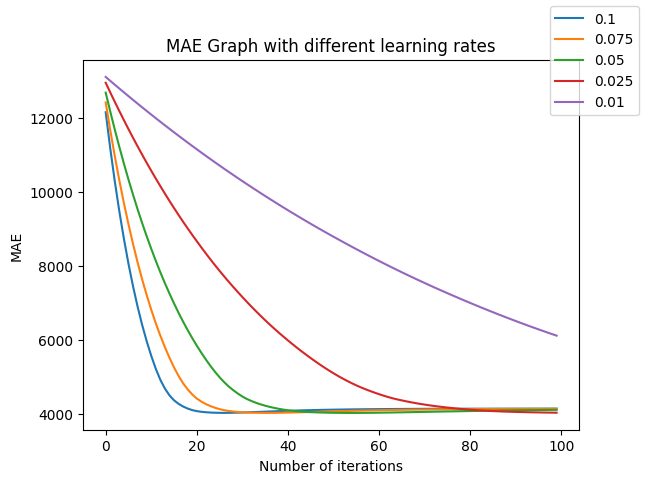

In [75]:
fig,ax = plt.subplots()
ax=plt.plot(np.arange(n_iterations),cost_lst[0],label="0.1")
ax=plt.plot(np.arange(n_iterations),cost_lst[1],label="0.075")
ax=plt.plot(np.arange(n_iterations),cost_lst[2],label="0.05")
ax=plt.plot(np.arange(n_iterations),cost_lst[3],label="0.025")
ax=plt.plot(np.arange(n_iterations),cost_lst[4],label="0.01")
plt.title('MAE Graph with different learning rates')
plt.xlabel('Number of iterations')
plt.ylabel('MAE')
fig.legend()
plt.show()

In [76]:
eta_ls= [0.1,0.075,0.05,0.025,0.01]
cost_lst=[]
for eta in eta_ls:
 # learning rate
    rse_lst=list()
    n_iterations = 100
    m = X.shape[0]

    X_b=np.c_[np.ones([X_train.shape[0],1]),X_train] #preprocessing
    theta = np.random.randn(len(X_b[0]), 1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta = theta - eta * gradients
        r2=compute_r2(y_train, X_b.dot(theta))
        rse_lst.append(r2)
    cost_lst.append(rse_lst)

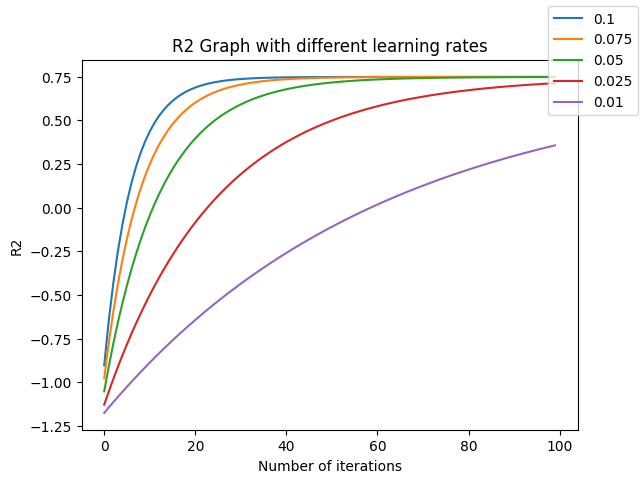

In [77]:
fig,ax = plt.subplots()
ax=plt.plot(np.arange(n_iterations),cost_lst[0],label="0.1")
ax=plt.plot(np.arange(n_iterations),cost_lst[1],label="0.075")
ax=plt.plot(np.arange(n_iterations),cost_lst[2],label="0.05")
ax=plt.plot(np.arange(n_iterations),cost_lst[3],label="0.025")
ax=plt.plot(np.arange(n_iterations),cost_lst[4],label="0.01")
plt.title('R2 Graph with different learning rates')
plt.xlabel('Number of iterations')
plt.ylabel('R2')
fig.legend()
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # LinearRegression use the SVD approach
lin_reg.fit(X_train, y_train)
lin_reg.intercept_,lin_reg.coef_

(array([13165.10628195]),
 array([[3.64854047e+03, 9.70854954e+01, 1.99264683e+03, 5.48696698e+02,
         9.53979350e+03, 1.07305916e+17, 1.07418377e+17, 1.11471117e+17,
         1.07418377e+17]]))

In [79]:
y_predict = lin_reg.predict(X_test)
r2_score=compute_r2(y_test,y_predict)
rss,rse=compute_rss_rse(y_test,y_predict)
mae_sk=MAE(y_test,y_predict)
print(f"the r2 is {r2_score} the rss is {rss} the rse is {rse} and the mae is {mae_sk}")

the r2 is 0.7584138954216313 the rss is 9966076609.626257 the rse is 6120.984677292337 and the mae is 4209.466400153572


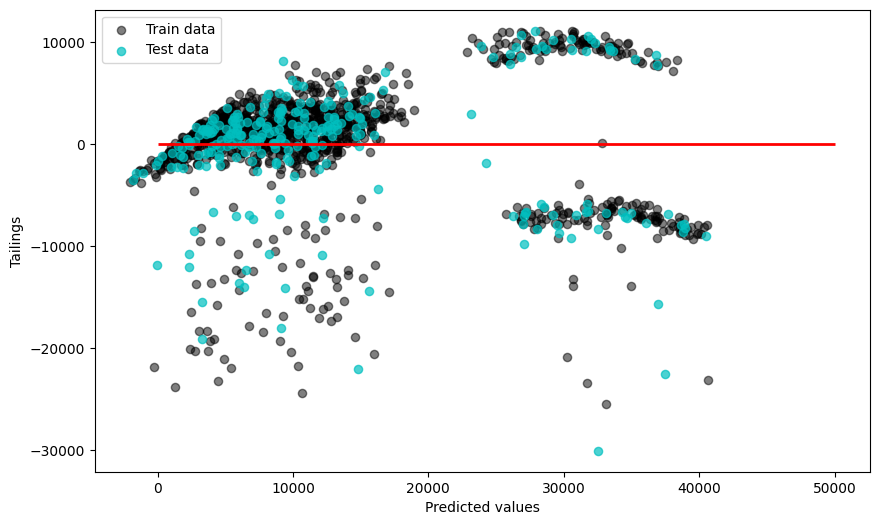

In [80]:
y_predict_train = lin_reg.predict(X_train)
y_predict_test = lin_reg.predict(X_test)
plt.figure(figsize=(10,6))

plt.scatter(y_predict_train,y_predict_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_predict_test,y_predict_test - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 50000, lw = 2, color = 'red')
plt.show()

In [81]:
# The parameters for linear regression model
sk_theta = np.float32(np.squeeze(lin_reg.coef_))

parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,age,3644.468614,3.648541e+03
1,theta_1,sex,126.891695,9.708549e+01
2,theta_2,bmi,2067.658532,1.992647e+03
3,theta_3,children,529.215709,5.486967e+02
4,theta_4,smoker,9545.178422,9.539794e+03
5,theta_5,region_northeast,307.549693,1.073059e+17
6,theta_6,region_northwest,105.604050,1.074184e+17
7,theta_7,region_southeast,-178.607504,1.114711e+17
8,theta_8,region_southwest,-226.423783,1.074184e+17


In [82]:
n_theta = np.float32(np.squeeze(n_theta[1:]))
parameter_df = parameter_df.join(pd.Series(n_theta, name='normal_equ_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta,normal_equ_theta
0,theta_0,age,3644.468614,3.648541e+03,3640.475830
1,theta_1,sex,126.891695,9.708549e+01,131.835358
2,theta_2,bmi,2067.658532,1.992647e+03,2100.289062
3,theta_3,children,529.215709,5.486967e+02,530.923706
4,theta_4,smoker,9545.178422,9.539794e+03,9533.966797
5,theta_5,region_northeast,307.549693,1.073059e+17,2496.000000
6,theta_6,region_northwest,105.604050,1.074184e+17,2304.000000
7,theta_7,region_southeast,-178.607504,1.114711e+17,2048.000000
8,theta_8,region_southwest,-226.423783,1.074184e+17,1728.000000


<AxesSubplot: >

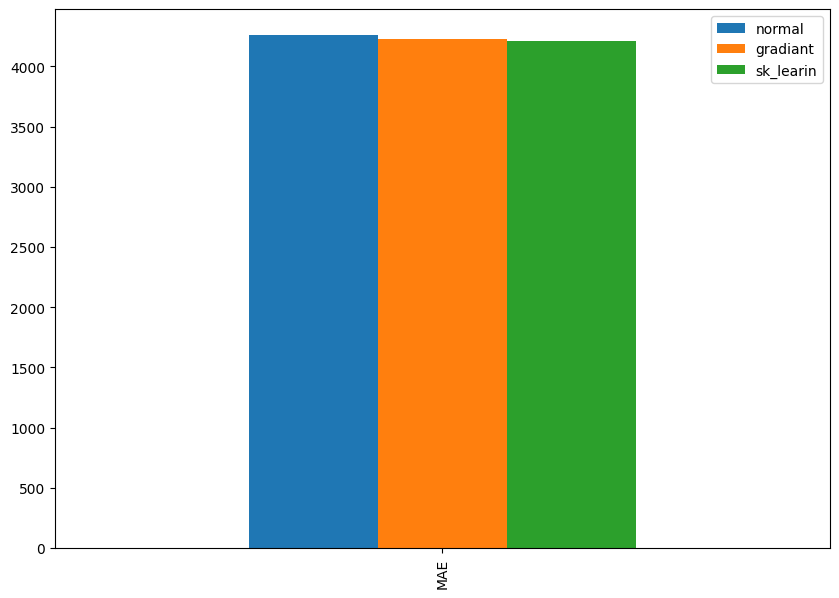

In [87]:
pd.DataFrame({'normal': mae_n,
              'gradiant':mae_g,
              'sk_learin': mae_sk},index=['MAE']).plot(figsize=(10, 7), kind='bar')